In [5]:
import sys
sys.path.append("../../")
import data_loading as dl
from importlib import reload
reload(dl)

from microfit import run_plotter as rp
from microfit import histogram as hist

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
run_numbers = [1,3]
rundata, weight, data_pot = dl.load_runs(run_numbers, data="bnb",loadpi0variables=True,loadshowervariables=True,loadrecoveryvars=True,loadsystematics=True)
print(rundata)

../../data_loading.py:1023: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1023: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:542: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:542: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../data_loading.py:705: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot /

In [45]:
print(weight)

{'data': 1.0, 'ext': 0.37639613453582893, 'mc': 0.16, 'nue': 0.0032615384615384616, 'drt': 0.6513056835637481}


In [32]:
runsdata = {}    # dictionary containing each run dictionary
output = {}     # same format as load_run output but with all the dataframes concatenated by run
run_numbers = [1,3]
for run in run_numbers:
    runsdata[f"{run}"], weights, data_pot = dl.load_run(run, "bnb",truth_filtered_sets=["nue"],loadpi0variables=True,loadshowervariables=True,loadrecoveryvars=True,loadsystematics=True)
    

../../data_loading.py:1023: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1023: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:542: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:542: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../data_loading.py:705: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot /

In [22]:
print(runsdata)
print()

# RUN, rundict = runsdata.items()[0]
rundict = runsdata[f"{run_numbers[0]}"]
data_sets = rundict.keys()
print(data_sets)

for dataset in data_sets:
    df = pd.concat([rundata[dataset] for run, rundata in runsdata.items()])
    output[dataset] = df
    
print(output)
        

# for run, rundata in runsdata.items():
#     print(run)
#     print()
#     print(rundata)
#     print()

{'1': {'data':        shr_tkfit_gap10_dedx_V  pi0_dedx2_fit_U  pi0_mass_V  shr_tkfit_npoints  \
entry                                                                           
0                1.943107e+00         2.547217   -1.000000                466   
1                3.595229e+00         1.943036  111.668457                432   
2                2.040284e+00         0.155899    0.000000                545   
3                4.466516e+00         1.288995  115.900978                737   
4                1.533699e+00         0.885804    9.850986                138   
...                       ...              ...         ...                ...   
8446             4.258981e+00         1.925070  705.216980               1087   
8447             2.420076e+00         1.925070   -1.000000                381   
8448            -9.290926e-03         1.991662   31.923960                238   
8449            -3.402823e+38         6.641115   20.137831                223   
8450         

{'data':        shr_tkfit_gap10_dedx_V  pi0_dedx2_fit_U  pi0_mass_V  shr_tkfit_npoints  \
entry                                                                           
0                1.943107e+00         2.547217   -1.000000                466   
1                3.595229e+00         1.943036  111.668457                432   
2                2.040284e+00         0.155899    0.000000                545   
3                4.466516e+00         1.288995  115.900978                737   
4                1.533699e+00         0.885804    9.850986                138   
...                       ...              ...         ...                ...   
12870            2.974177e+00         3.495060   89.889160                 96   
12871           -3.402823e+38         3.495060  140.789139                651   
12872           -9.275997e-03         1.929591  230.402344                425   
12873            7.074433e+00         1.084908   -1.000000                209   
12874            1.

In [39]:
run_numbers = [1,3]
runsdata = {}    # dictionary containing each run dictionary
weights = {}    # dictionary containing each weights dictionary
data_pots = np.zeros(len(run_numbers))
output = {}      # same format as load_run output dictionary but with each dataframe concatenated by run
weights_combined = {}
for run in run_numbers:
    runsdata[f"{run}"], weights[f"{run}"], data_pots[run_numbers.index(run)] = dl.load_run(run, "bnb",truth_filtered_sets=["nue"],loadpi0variables=True,loadshowervariables=True,loadrecoveryvars=True,loadsystematics=True)
    

In [41]:
weights_combined = {}
pot_sum = np.sum(data_pots)
rundict = runsdata[f"{run_numbers[0]}"]
data_sets = rundict.keys() # get the names of the datasets that have been loaded
for dataset in data_sets:
    df = pd.concat([rundata[dataset] for run_key, rundata in runsdata.items()])
    output[dataset] = df
    weights_arr = np.array([])
    for run_key, weight_dict in weights.items():
        weights_arr = np.append(weights_arr, weight_dict[dataset])
    mc_pots = data_pots/weights_arr
    weight_sum = pot_sum / np.sum(mc_pots)
    weights_combined[dataset] = weight_sum

print(pot_sum)
print()
print(weights_combined)

4.24e+20

{'data': 1.0, 'ext': 0.37639613453582893, 'mc': 0.16, 'nue': 0.0032615384615384616}


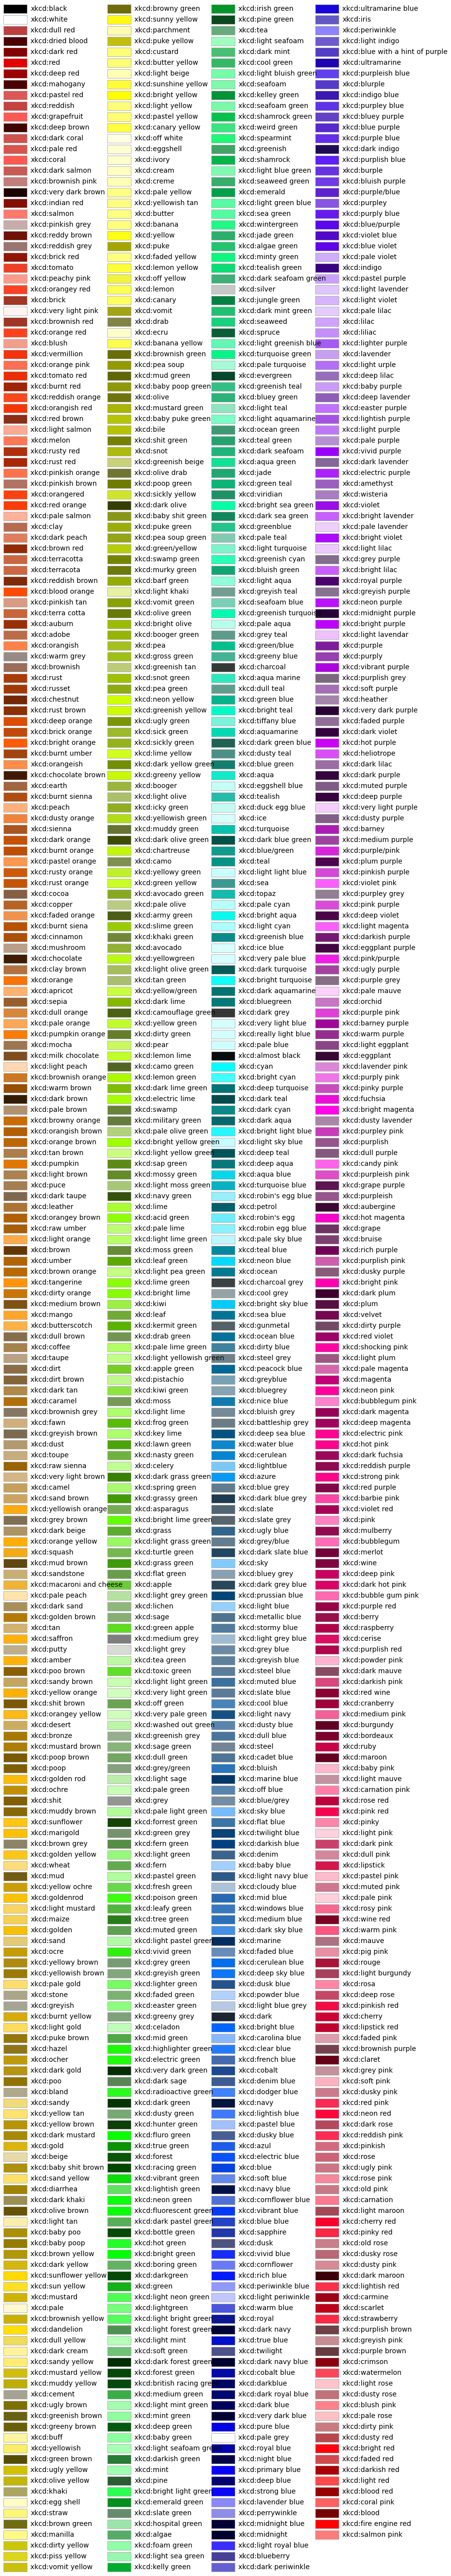

In [4]:
import math

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

xkcd_fig = plot_colortable(mcolors.XKCD_COLORS)
#xkcd_fig.savefig("XKCD_Colors.png")

In [2]:
pot_data_unblinded = {
    # v47 NTuples
    # 0304 samples
    #    "opendata" : {
    #        1: (4.08E+19, 9028010),
    #        2: (1.00E+01, 1),
    #        3: (7.63E+18, 1838700), },
    # 0628 samples
    "fulldata": {
        1: (1.67e20, 37094101),
        2: (2.62e20, 62168648),
        3: (2.57e20, 61381194),
    },
    # 1: (4.54E+19, 10080350),
    # 2: (9.43E+18, 2271036),
    # 3: (9.43E+18, 2271036),},
    "opendata": {
        1: (4.54e19, 10080350),
        2: (1.00e01, 1),
        3: (9.43e18, 2271036),
    },
    "pi0": {
        1: (1.509e20, 33582996),
        2: (2.411e20, 56116016),
        3: (1.971e20, 47133521),
    },
}

pot_mc_samples = {}

# v48
pot_mc_samples[30] = {
    "mc": 1.34e21,  # 1.33E+21,
    "nue": 7.75e22,  # 7.73E+22,
    "lee": 7.75e22,  # 7.73E+22,
    "ncpi0": 2.31e21,  # 2.29E+21,
    "ccpi0": (6.43e21),  # /2., # (6.40E+21)/2.,
    "dirt": 3.28e20,  # 3.20E+20,
    "ncnopi": 7.14e21,  # 7.23E+21,
    "nccpi": 1.82e22,  # 1.80E+22,
    "ccnopi": 5.51e21,  # 5.51E+21,
    "cccpi": 5.18e21,  # 5.19E+21,
    "ext": 198642758,  # 30 -> Run3 G-only
}

pot_mc_samples[3] = {
    "mc": 1.34e21,  # 1.33E+21,
    #'mc': 19.68E+20, # DETVAR
    "nue": 7.75e22,  # 7.73E+22,
    "lee": 7.75e22,  # 7.73E+22,
    "ncpi0": 2.31e21,  # 2.29E+21,
    "ccpi0": (6.43e21) / 2.0,  # (6.40E+21)/2.,
    "dirt": 3.28e20,  # 3.20E+20,
    "ncnopi": 1.59e22,  # 7.23E+21,
    "nccpi": 3.63e22,  # 1.80E+22,
    "ccnopi": 1.11e22,  # 5.51E+21,
    "cccpi": 1.48e22,  # 5.19E+21,
    "eta": 2.41e22,
    "ext": 205802114,  # OLD: 214555174
}

pot_mc_samples[2] = {
    "mc": 1.02e21,  # 1.01E+21,
    "nue": 6.32e22,  # 6.41E+22,
    "lee": 6.32e22,  # 6.41E+22,
    "ext": 153236385,  # OLD: 152404980
    "dirt": 9.50e20,
}

pot_mc_samples[1] = {
    "mc": 1.31e21,  # 1.30E+21,
    #'mc': 18.93E+20, #DETVAR
    "nue": 5.25e22,  # 5.25E+22,
    "lee": 5.25e22,  # 5.25E+22,
    "ncpi0": 1.16e22,  # 2.66E+21, # 2.63E+21,
    "ccpi0": 3.48e21,  # 3.45E+21,
    "dirt": 3.23e20,  # 3.21E+20,
    "ncnopi": 1.31e22,  # 4.24E+21,
    "nccpi": 2.76e22,  # 8.93E+21,
    "ccnopi": 1.14e22,  # 5.81E+21,
    "cccpi": 1.55e22,  # 6.04E+21,
    "eta": 1.03e0,
    "ext": 65473410,  # OLD: 65498807
}

In [3]:
RUN = 3
reload(dl)
df_bnb = dl.load_sample(RUN, "runs", "bnb", loadpi0variables=True, loadshowervariables=True, loadrecoveryvars=True)
df_ext = dl.load_sample(RUN, "runs", "ext", loadpi0variables=True, loadshowervariables=True, loadrecoveryvars=True)
df_nu = dl.load_sample(RUN, "runs", "nu", loadpi0variables=True, loadshowervariables=True, loadrecoveryvars=True)

/uboone/app/users/mmoudgal/pelee/PELEE/data_loading.py:1015: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
/uboone/app/users/mmoudgal/pelee/PELEE/data_loading.py:1015: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
/uboone/app/users/mmoudgal/pelee/PELEE/data_loading.py:534: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/mmoudgal/pelee/PELEE/data_loading.py:534: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/uboone/ap

In [5]:
df_bnb

,true_nu_vtx_sce_y,shr_tkfit_2cm_dedx_Y,pi0_gammadot,shr_hits_tot,shr_hits_u_tot,pi0_dir1_z,pi0_shrscore2,trk_end_x_v,true_nu_vtx_sce_x,pi0_radlen2,...,reco_e_rqe,pi0_score,nonpi0_score,bkg_score,is_signal,bnbdata,extdata,paper_category,paper_category_xsec,paper_category_numu
entry,,,,,,,,,,,,,,,,,,,,,
0,-3.402823e+38,-3.402823e+38,0.189630,333,149,0.951963,0.311878,"[155.48076, 16.181955, 128.29195]",-3.402823e+38,1.479541,...,0.284937,0.059067,0.048112,0.064854,False,True,False,2,2,0
1,-3.402823e+38,1.304811e+01,-1.000000,1967,635,0.000000,-1.000000,"[53.536465, 56.947826, 93.842476, 91.20676, 93...",-3.402823e+38,-1.000000,...,0.618965,0.418860,0.373217,0.118335,False,True,False,2,2,0
2,-3.402823e+38,1.904779e+00,-1.000000,186,84,0.000000,-1.000000,"[214.94188, 200.8554]",-3.402823e+38,-1.000000,...,1.134773,0.058138,0.053867,0.117109,False,True,False,2,2,0
3,-3.402823e+38,1.976579e+00,-0.358257,1931,541,0.938112,0.663215,"[18.147217, 12.360418, 62.926926, 129.36693, 3...",-3.402823e+38,0.676328,...,0.818240,0.968888,0.964878,0.891829,False,True,False,2,2,0
4,-3.402823e+38,3.812114e+00,-0.679986,389,118,-0.952941,0.103435,"[97.12782, 218.26726, 143.19568, 162.38448]",-3.402823e+38,3.112717,...,0.216973,0.190336,0.204846,0.147355,False,True,False,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12870,-3.402823e+38,4.386450e+00,-0.235042,175,0,-0.811094,0.114592,"[54.23655, 18.706184, 49.32058]",-3.402823e+38,19.168064,...,0.378013,0.013511,0.010767,0.060428,False,True,False,2,2,0
12871,-3.402823e+38,1.523903e+00,0.901644,820,388,0.173024,0.016519,"[179.16197, 219.62534, 238.4154, 220.81047, 22...",-3.402823e+38,13.493571,...,0.755686,0.038336,0.103002,0.058755,False,True,False,2,2,0
12872,-3.402823e+38,3.210448e+00,-0.639736,706,221,0.886642,0.021325,"[107.4294, 77.387474, 58.826824, 40.632877, 71...",-3.402823e+38,26.571566,...,0.266397,0.020160,0.022121,0.024890,False,True,False,2,2,0


In [6]:
df_ext

,true_nu_vtx_sce_y,shr_tkfit_2cm_dedx_Y,pi0_gammadot,shr_hits_tot,shr_hits_u_tot,pi0_dir1_z,pi0_shrscore2,trk_end_x_v,true_nu_vtx_sce_x,pi0_radlen2,...,reco_e_rqe,pi0_score,nonpi0_score,bkg_score,is_signal,bnbdata,extdata,paper_category,paper_category_xsec,paper_category_numu
entry,,,,,,,,,,,,,,,,,,,,,
0,-3.402823e+38,1.085334,-1.000000,400,231,0.000000,-1.000000,[81.95678],-3.402823e+38,-1.000000,...,1.229285,0.546825,0.595947,0.798379,False,False,True,2,2,0
1,-3.402823e+38,1.836686,-1.000000,1708,499,0.000000,-1.000000,[117.07821],-3.402823e+38,-1.000000,...,1.609643,0.388972,0.391870,0.789007,False,False,True,2,2,0
2,-3.402823e+38,2.013916,0.692319,529,160,0.389772,0.075784,"[247.18758, 235.26585, 192.03468, 194.01434]",-3.402823e+38,150.021988,...,0.735553,0.116302,0.104357,0.026577,False,False,True,2,2,0
3,-3.402823e+38,1.059132,-1.000000,117,49,0.000000,-1.000000,"[218.51529, 188.14706]",-3.402823e+38,-1.000000,...,0.217232,0.002477,0.001911,0.240557,False,False,True,2,2,0
4,-3.402823e+38,3.223588,0.768183,262,123,0.484744,0.605883,"[197.05226, 208.74825]",-3.402823e+38,2.187489,...,0.670713,0.022154,0.015363,0.134619,False,False,True,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,-3.402823e+38,4.901173,-0.870965,228,55,-0.674911,0.024920,"[196.45387, 190.16743]",-3.402823e+38,4.728386,...,1.110683,0.075285,0.082317,0.172415,False,False,True,2,2,0
10286,-3.402823e+38,2.048905,-1.000000,722,224,0.000000,-1.000000,[251.9598],-3.402823e+38,-1.000000,...,1.832023,0.266347,0.346063,0.194102,False,False,True,2,2,0
10287,-3.402823e+38,0.778897,-1.000000,71,40,0.000000,-1.000000,"[191.95454, 189.0127, 188.75548]",-3.402823e+38,-1.000000,...,0.521998,0.211875,0.198966,0.265976,False,False,True,2,2,0


In [7]:
df_nu

,true_nu_vtx_sce_y,shr_tkfit_2cm_dedx_Y,pi0_gammadot,shr_hits_tot,shr_hits_u_tot,pi0_dir1_z,pi0_shrscore2,trk_end_x_v,true_nu_vtx_sce_x,pi0_radlen2,...,pi0weight,dx,dy,dz,dr,bnbdata,extdata,paper_category,paper_category_xsec,paper_category_numu
entry,,,,,,,,,,,,,,,,,,,,,
0,36.462616,2.153027e+00,-1.000000,118,10,0.000000,-1.000000,"[195.16193, 76.59974, 185.82443, 42.957493]",55.719978,-1.000000,...,1.0,-0.021561,0.070381,-0.045563,0.086570,False,False,2,2,0
1,-25.461615,-3.402823e+38,-0.498205,225,87,-0.099269,0.262403,"[110.330986, 33.5863, 32.459473]",26.842400,36.999500,...,1.0,0.039904,-0.122095,-0.000549,0.128452,False,False,2,2,0
2,32.932293,2.305957e+00,-0.315158,198,86,-0.185282,0.746626,"[115.90151, 147.61711, 167.40561]",207.928619,0.961523,...,1.0,-46.981583,-34.999985,44.849487,73.781738,False,False,3,3,0
3,4.890363,4.729955e+00,-0.264211,543,156,0.897781,0.295082,"[72.34445, 84.115974, 79.40136]",103.864517,27.797016,...,1.0,-14.528252,23.876347,-14.563492,31.515795,False,False,31,31,0
4,-43.045361,2.142432e+00,-1.000000,272,43,0.000000,-1.000000,"[62.361015, 88.37144, 89.31287, 72.158714]",78.517906,-1.000000,...,1.0,0.063339,-0.114971,-0.064148,0.146100,False,False,21,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32768,41.490376,1.804031e+01,-0.502688,116,53,-0.934248,0.662966,"[188.6436, 190.56691, 203.56828]",192.480530,1.172722,...,1.0,-0.047119,-0.301891,-0.293396,0.423603,False,False,3,3,0
32769,-41.614613,6.968952e+00,-0.070513,289,32,0.568155,0.111672,"[121.488174, 87.87444, 75.93818]",90.050804,48.526077,...,1.0,-0.176895,0.311275,0.390259,0.529610,False,False,31,31,0
32770,-108.675819,7.317391e+00,0.481977,244,46,-0.068906,0.029808,"[100.19827, 59.02173, 55.146652, 84.623344, 81...",100.688545,27.127459,...,1.0,-18.855156,22.552986,4.363586,29.718596,False,False,5,5,0


In [4]:
import pandas as pd

data_pot, data_trig = pot_data_unblinded["fulldata"][RUN]
ext_trig = pot_mc_samples[RUN]["ext"]
mc_pot = pot_mc_samples[RUN]["mc"]

# concatenate nu and ext and add a label column
# df_bnb["label"] = "bnb"  # not this one, because this is the data we want to overlay
df_ext["label"] = "ext"
# Because ext is derived from real data (with the beam turned off), the weights are all 
# one.
df_ext["weights"] = 1.0
# Normalize the ext to the data TRIG
df_ext["weights"] *= data_trig / ext_trig

df_nu["label"] = "nu"
# The "nu" weights are normalized to the same POT as the data
df_nu["weights"] = df_nu["weightSplineTimesTune"] * data_pot / mc_pot
df = pd.concat([df_nu, df_ext])

# make label a categorical variable
df["label"] = df["label"].astype("category")

In [5]:
from unblinding_far_sideband import selection_categories, basic_variables, preselection_categories

In [10]:
df_nu["nproton"]

entry
0        2
1        1
2        1
3        1
4        2
        ..
32768    5
32769    0
32770    1
32771    0
32772    0
Name: nproton, Length: 32773, dtype: int32

In [11]:
sum((df_nu["nelec"] == 1) & (df_nu["nproton"] == 1))

629

Data bin counts: [ 1 13 17 15  3  5  5  2  5  1  3  3  0  2  0  1  0]


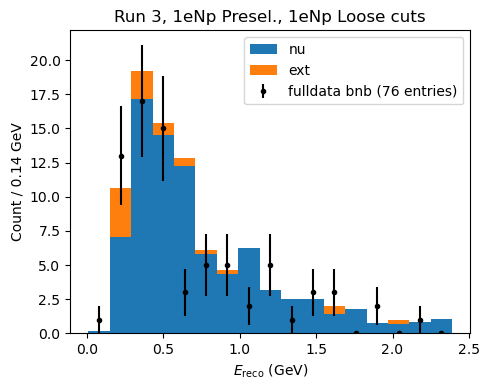

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


VARIABLE, BINS, RANGE, XTIT = "reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [ GeV ]"
labels = df["label"].unique()

selection = "NPL"
preselection = "NP"

presel_query = preselection_categories[preselection]["query"]
presel_title = preselection_categories[preselection]["title"]

sel_query = selection_categories[selection]["query"]
sel_title = selection_categories[selection]["title"]

if presel_query is None:
    query = sel_query
    presel_title = "No Presel."
elif sel_query is None:
    query = presel_query
    sel_title = "No Sel."
else:
    query = f"{presel_query} and {sel_query}"

fig, ax = plt.subplots(figsize=(5, 4))

bnb_filtered = df_bnb.query(query)

# Plot the beam-on data (bnb) on top as points with error bars
hist, bin_edges = np.histogram(bnb_filtered[VARIABLE], bins=BINS, range=RANGE)
hist_err = np.sqrt(hist)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2.0
bin_width = (bin_edges[1:] - bin_edges[:-1])[0]
entries = np.sum(hist)
ax.errorbar(bin_centers, hist, yerr=hist_err, fmt=".", color="black", label=f"fulldata bnb ({entries:.0f} entries)")

print(f"Data bin counts: {hist}")

# Plot the MC as a stacked histogram
data = [df.query(query).loc[df.query(query)["label"] == lbl, VARIABLE] for lbl in labels]
weights = [df.query(query).loc[df.query(query)["label"] == lbl, "weights"] for lbl in labels]

ax.hist(data, bins=BINS, range=RANGE, stacked=True, label=labels, weights=weights)

ax.legend()

ax.set_xlabel(r"$E_\mathrm{reco}$ (GeV)")
ax.set_ylabel(f"Count / {bin_width:.2f} GeV")
ax.set_title(f"Run {RUN}, {presel_title}, {sel_title}")

fig.tight_layout()

# fig.savefig(f"run{RUN}_{presel_title.replace(' ', '_').lower()}_{sel_title.replace(' ', '_').lower()}.pdf")

In [8]:
query

'nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and n_showers_contained == 1'

In [12]:
RUN = 1
rundata = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=["nue", "nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)

../../data_loading.py:1015: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1015: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:534: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:534: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../data_loading.py:697: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot /

In [4]:
rundata.keys()

dict_keys(['data', 'ext', 'nu', 'drt', 'nue', 'nc_pi0'])

In [38]:
print(len(rundata["nu"]))
rundata["nu"].head(1)

31977


,DeltaRMS2h,pion_e,pi0_nshower,shr_bkt_E,pi0truth_gamma1_edep,matched_E,shr_tkfit_dedx_y_v,secondshower_U_dot,weightSplineTimesTune,shr_tkfit_2cm_nhits_U,...,dy,dz,dr,bnbdata,extdata,paper_category,paper_category_xsec,paper_category_numu,dataset,weights
entry,,,,,,,,,,,,,,,,,,,,,
0,1.311946,0.0,0,0.171256,118.254692,0.171256,"[9.284069, 3.376491, -3.4028235e+38]",0.98702,1.0,4,...,15.266212,4.308716,15.863662,False,False,31,31,0,nu,0.127481


In [25]:
sum(rundata["nu"]["nu_pdg"] == -12)

43

In [26]:
sum(rundata["nu"]["nu_pdg"] == 12)

1113

In [20]:
rundata["nu"].query("abs(nu_pdg) != 12", inplace=True)
print(len(rundata["nu"]))

30821


In [13]:
df_ncpi0 = rundata["nu"].query("ccnc==1 and npi0==1 and npion>=0 and (category==31 or category==5) and (abs(nu_pdg)==12 or abs(nu_pdg)==14)")
print(len(df_ncpi0))
df_ncpi0.head(5)

8292


,trk_bkt_pdg,shr_id,trk_theta_v,shr_tkfit_2cm_dedx_U,shr_dedx_Y_cali,shr_tkfit_dedx_Y,pi0_mass_U,shr_tkfit_dedx_V,secondshower_U_nhit,trk_score,...,dy,dz,dr,bnbdata,extdata,paper_category,paper_category_xsec,paper_category_numu,dataset,weights
entry,,,,,,,,,,,,,,,,,,,,,
0,0,1,"[1.3115554, 1.8599672, -3.4028235e+38]",4.921190,4.766667,9.278653,98.948326,3.658297,6,-3.402823e+38,...,15.266212,4.308716,15.863662,False,False,31,31,0,nu,0.127481
2,2212,1,"[0.70616555, 0.999378, 1.1588858]",0.530164,2.671892,2.187500,51.388199,2.806930,14,9.037837e-01,...,0.278091,0.042976,0.282232,False,False,31,31,0,nu,0.127481
3,0,1,"[1.8869523, 2.1530046, 2.9670033]",4.244507,0.951225,3.945682,88.056992,2.499080,4,-3.402823e+38,...,-0.671393,-4.739807,8.048138,False,False,31,31,0,nu,0.127481
6,0,1,[1.9056957],3.611439,2.032408,3.136431,-1.000000,4.006280,11,-3.402823e+38,...,36.095840,-18.347656,48.812111,False,False,5,5,0,nu,0.127481
10,22,1,"[1.5195885, 1.6570466]",2.527457,0.089680,0.126903,-1.000000,2.096254,2,9.255707e-01,...,71.985962,8.606079,91.440979,False,False,31,31,0,nu,0.127481


In [43]:
print(len(rundata["nu"]))
rundata["nu"].drop(labels=df_ncpi0.index, axis=0, inplace=True)
print(len(rundata["nu"]))

31977
23685


In [45]:
print(len(rundata["nu"]))
rundata["nu"].drop(index=df_ncpi0.index, inplace=True)
print(len(rundata["nu"]))

31977
23685


In [2]:
RUN = 1
output = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=["nue", "nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)


../../data_loading.py:1015: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1015: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:534: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:534: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../data_loading.py:697: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot /

NameError: name 'get_rundict' is not defined

In [14]:
rundict = dl.get_rundict(RUN, "runs", "nc_pi0")
df_temp = output["nu"].query(rundict["nc_pi0"]["filter"])

print(len(df_temp))
df_temp.head(5)

8292


,trk_bkt_pdg,shr_id,trk_theta_v,shr_tkfit_2cm_dedx_U,shr_dedx_Y_cali,shr_tkfit_dedx_Y,pi0_mass_U,shr_tkfit_dedx_V,secondshower_U_nhit,trk_score,...,dy,dz,dr,bnbdata,extdata,paper_category,paper_category_xsec,paper_category_numu,dataset,weights
entry,,,,,,,,,,,,,,,,,,,,,
0,0,1,"[1.3115554, 1.8599672, -3.4028235e+38]",4.921190,4.766667,9.278653,98.948326,3.658297,6,-3.402823e+38,...,15.266212,4.308716,15.863662,False,False,31,31,0,nu,0.127481
2,2212,1,"[0.70616555, 0.999378, 1.1588858]",0.530164,2.671892,2.187500,51.388199,2.806930,14,9.037837e-01,...,0.278091,0.042976,0.282232,False,False,31,31,0,nu,0.127481
3,0,1,"[1.8869523, 2.1530046, 2.9670033]",4.244507,0.951225,3.945682,88.056992,2.499080,4,-3.402823e+38,...,-0.671393,-4.739807,8.048138,False,False,31,31,0,nu,0.127481
6,0,1,[1.9056957],3.611439,2.032408,3.136431,-1.000000,4.006280,11,-3.402823e+38,...,36.095840,-18.347656,48.812111,False,False,5,5,0,nu,0.127481
10,22,1,"[1.5195885, 1.6570466]",2.527457,0.089680,0.126903,-1.000000,2.096254,2,9.255707e-01,...,71.985962,8.606079,91.440979,False,False,31,31,0,nu,0.127481


In [20]:
print(len(output["nu"]))
output["nu"].drop(index=df_temp.index, inplace=True)
print(len(output["nu"]))

31977
23685


In [33]:
# After implementing the code to remove double-counting

RUN = 1

df_nu = dl.load_sample(RUN, "runs", "nu", loadpi0variables=True, loadshowervariables=True, loadrecoveryvars=True)
print(len(df_nu))

output = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=['nue','nc_pi0','cc_pi0','cc_nopi','cc_cpi','nc_nopi','nc_cpi'],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)
print(len(output["nu"]))

31977
5526


In [32]:
output = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=['nue'],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)
print(len(output["nu"]))

30821


In [27]:
output = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=['cc_pi0'],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)
print(len(output["nu"]))

24005


In [28]:
output = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=['cc_nopi'],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)
print(len(output["nu"]))

28848


In [29]:
output = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=['cc_cpi'],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)
print(len(output["nu"]))

25056


In [30]:
output = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=['nc_nopi'],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)
print(len(output["nu"]))

31295


In [31]:
output = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=['nc_cpi'],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)
print(len(output["nu"]))

29793


In [2]:
output = dl.load_run(
    1,
    "bnb",
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)
print(len(output["nu"]))

../../data_loading.py:1015: RuntimeWarning: overflow encountered in multiply
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:1015: RuntimeWarning: invalid value encountered in subtract
  mc_Q2 = -1 * (mc_q_E * mc_q_E - mc_q_px * mc_q_px - mc_q_py * mc_q_py - mc_q_pz * mc_q_pz)
../../data_loading.py:534: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
../../data_loading.py:534: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2 * e1 * e2 * (1 - px1 * px2 - py1 * py2 - pz1 * pz2))
/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
../../data_loading.py:697: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot /

KeyError: 'filter'

In [35]:
reload(dl)
RUN = 3
rundata, weights, data_pot = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=["nue", "cc_pi0", "nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)


In [36]:
print(weights)

{'data': 1.0, 'ext': 0.3090029287652158, 'mc': 0.1917910447761194, 'nue': 0.003316129032258065, 'cc_pi0': 0.03996889580093312, 'nc_pi0': 0.11125541125541126}


In [9]:
reload(dl)
RUN = 1
rundata, weights, data_pot = dl.load_run(
    RUN,
    "bnb",
    truth_filtered_sets=["nue", "cc_pi0", "nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
)

In [10]:
reload(rp)
reload(hist)


selection = "NPL"
preselection = "NP"

plotter = rp.Plotter(rundata, selection, preselection, variable="reco_e", data_pot=data_pot, weight_column="weights")

{}


<AxesSubplot:title={'center':'1eNp Presel. and 1eNp Loose cuts'}, xlabel='Reconstructed Energy [ GeV ]', ylabel='Events'>

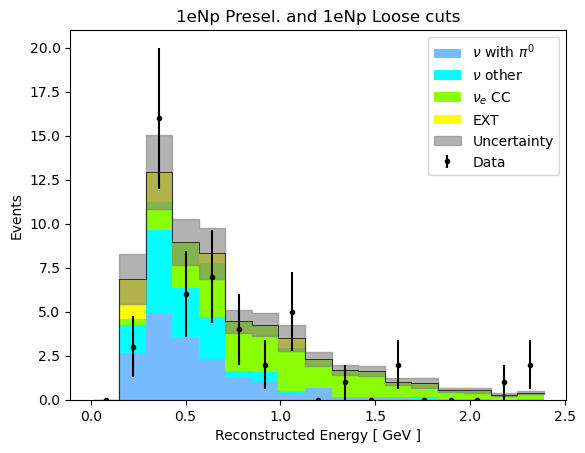

In [4]:
plotter.plot(category_column="paper_category", include_multisim_errors=True)

<AxesSubplot:title={'center':'1eNp Presel. and 1eNp Loose cuts'}, xlabel='Reconstructed Energy [ GeV ]', ylabel='Events'>

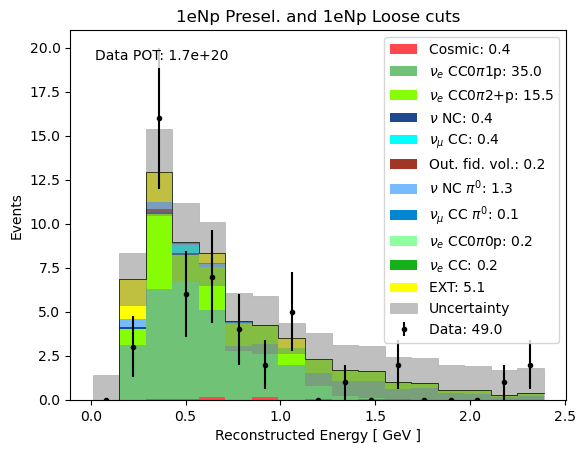

In [14]:
# Plotting with my new 'category_1e1p' labels where Np is split into 1p and 2+p

reload(rp)
reload(hist)


selection = "NPL"
preselection = "NP"

plotter = rp.Plotter(rundata, selection, preselection, variable="reco_e", data_pot=data_pot, weight_column="weights")
plotter.plot(category_column="category_1e1p", include_multisim_errors=True)

<AxesSubplot:title={'center':'1eNp Presel. and 1eNp Loose cuts'}, xlabel='Reconstructed Energy [ GeV ]', ylabel='Events'>

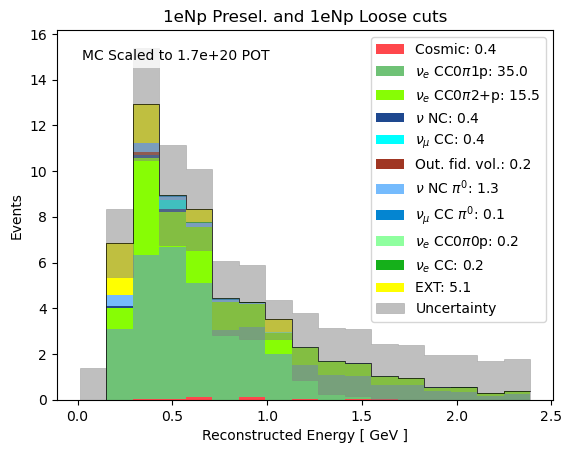

In [13]:
plotter.plot(category_column="category_1e1p", include_multisim_errors=True, scale_to_pot=data_pot)